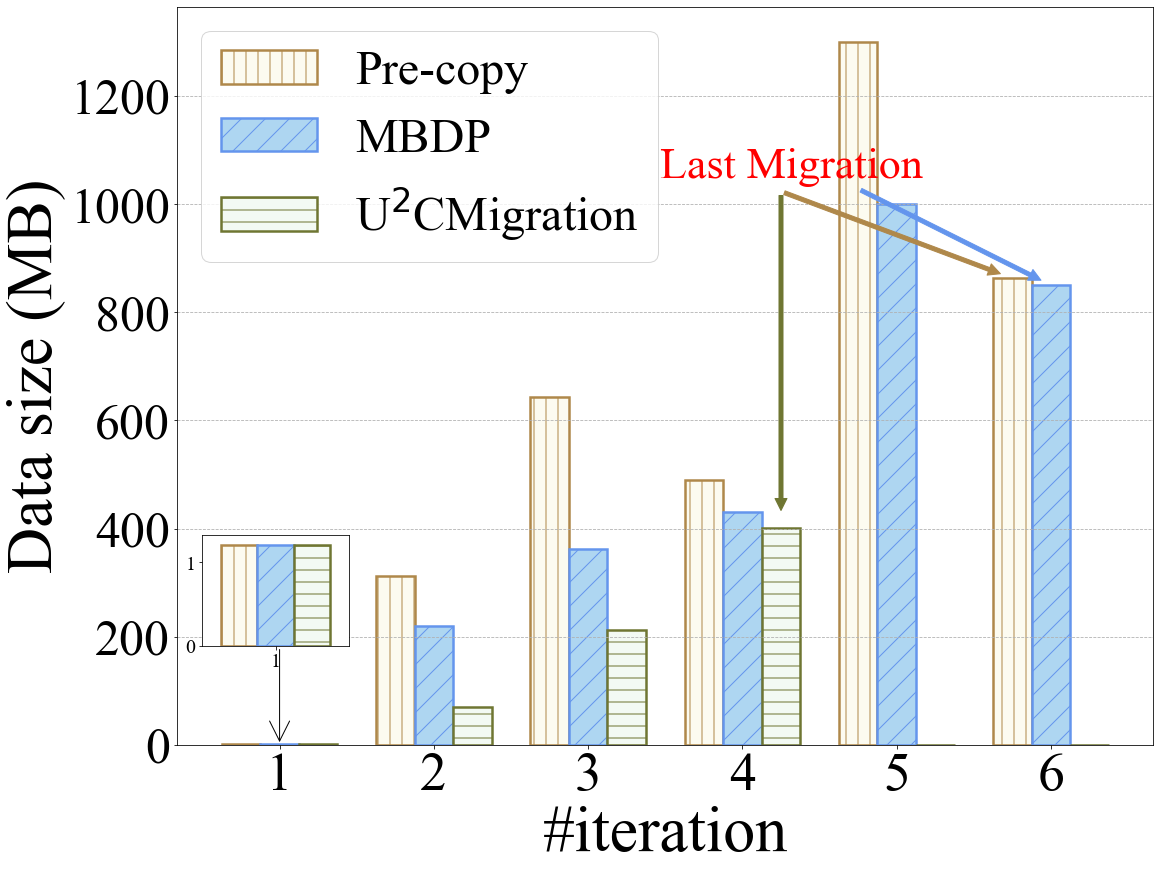

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib

# Set font configurations
label_size = 64
tick_size = 54
linewidth = 2.5
legend_size = 48
mark_size = 10
bwith = 2
matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 50
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def convert_size(size_str):
    """Converts a size string like '312M' or '1.5G' to megabytes (MB)."""
    size_str = size_str.strip().upper()
    multipliers = {'M': 1, 'G': 1e3, 'K': 1e-3}
    
    if size_str.endswith(('M', 'G', 'K')):
        return float(size_str[:-1]) * multipliers[size_str[-1]]
    else:  # Assuming raw byte value, convert bytes to MB
        return float(size_str) / 1e6

# Sample data
CHK_SIZE = ["1.2M", "312M", "644M", "490M", "1.3G", "863M"]
CHECK_CHK_SIZE_0 = ["1.2M", "220M", "363M", "430M", "1.0G", "850M"]
CHECK_CHK_SIZE = ["1.2M", "70M", "212M", "401M", "0", "0"]
chk_size_bytes = [convert_size(size) for size in CHK_SIZE]
check_chk_size_bytes = [convert_size(size) for size in CHECK_CHK_SIZE]
check_chk_size_0_bytes = [convert_size(size) for size in CHECK_CHK_SIZE_0]

# Create subplot with constrained layout
fig, ax1 = plt.subplots(figsize=(16, 12), constrained_layout=True)
width = 0.25  # Adjust bar width

# Plotting
x = np.arange(len(CHK_SIZE))
bars1 = ax1.bar(x - width, chk_size_bytes, color="#FCFBF0", edgecolor='#af884a', linewidth=2.5, width=width, hatch='|', label="Pre-copy")
bars2 = ax1.bar(x, check_chk_size_0_bytes, color="#AED6F1", edgecolor='#6495ED', linewidth=2.5, width=width, hatch='/', label="MBDP")
bars3 = ax1.bar(x + width, check_chk_size_bytes, color="#F3FAF3", edgecolor='#6f7632', linewidth=2.5, width=width, hatch='-', label="U$^{2}$CMigration")

# Annotate the last non-zero entry for each bar
def annotate_last_non_zero(ax, bar, color, offset,Name):
    last_non_zero_index = len(bar) - 1 - next((i for i, b in enumerate(reversed(bar)) if b.get_height()), 0)
    last_bar = bar[last_non_zero_index]
    ax.annotate(Name, 
                xy=(last_bar.get_x() + last_bar.get_width() / 2, last_bar.get_height()), 
                xytext=offset, textcoords='offset points', 
                arrowprops=dict(facecolor=color, edgecolor=color, shrink=0.05), 
                ha='center', color=color, fontsize=44)
def annotate_last_non_zero2(ax, bar, color,offset,Name):
    last_non_zero_index = len(bar) - 1 - next((i for i, b in enumerate(reversed(bar)) if b.get_height()), 0)
    last_bar = bar[last_non_zero_index]
    ax.annotate(Name, 
                xy=(last_bar.get_x() + last_bar.get_width() / 2, last_bar.get_height()), 
                 xytext=offset,textcoords='offset points', 
               
                ha='center', color=color, fontsize=44)
# Annotate last non-zero entries with different offsets
annotate_last_non_zero(ax1, bars1, '#af884a', (-240, 90),"")
annotate_last_non_zero(ax1, bars2, '#6495ED', (-200, 100),"")
annotate_last_non_zero(ax1, bars3, '#6f7632', (0, 350),"")
annotate_last_non_zero2(ax1, bars3, 'red',(10, 350),"Last Migration")
# Set labels and legend
ax1.set_xlabel('#iteration', fontsize=label_size)
ax1.set_ylabel('Data size (MB)', fontsize=label_size)
ax1.set_xticks(x)
ax1.set_xticklabels(range(1, len(CHK_SIZE) + 1), fontsize=tick_size)
ax1.legend(fontsize=legend_size, loc='upper left')
ax1.grid(axis='y', linestyle='--')

# Add inset for the first bar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax1, width="15%", height="15%", loc='lower left', 
                   bbox_to_anchor=(0, 0.1, 1, 1), bbox_transform=ax1.transAxes)

# Plotting the inset
bars1_inset = axins.bar(x - width, chk_size_bytes, color="#FCFBF0", edgecolor='#af884a', linewidth=2.5, width=width, hatch='|')
bars2_inset = axins.bar(x, check_chk_size_0_bytes, color="#AED6F1", edgecolor='#6495ED', linewidth=2.5, width=width, hatch='/')
bars3_inset = axins.bar(x + width, check_chk_size_bytes, color="#F3FAF3", edgecolor='#6f7632', linewidth=2.5, width=width, hatch='-')

# Set limits and ticks for the inset
axins.set_xlim(-0.5, 0.5)
axins.set_ylim(0, max(chk_size_bytes[0], check_chk_size_0_bytes[0], check_chk_size_bytes[0]) * 1.1)
axins.set_xticks([0])
axins.set_xticklabels(['1'])
axins.tick_params(axis='both', which='major', labelsize=20)
#axins.set_ylabel('MB', fontsize=20)
ax1.annotate('', xy=(0, chk_size_bytes[0]), xytext=(0, chk_size_bytes[0]*150),
             arrowprops=dict(facecolor='black', arrowstyle="->", connectionstyle="arc3"))

# Save the figure
fig.savefig(os.path.join(".", "mem-live-uuc.pdf"), format='pdf', bbox_inches='tight')

# Display the plot
plt.show()


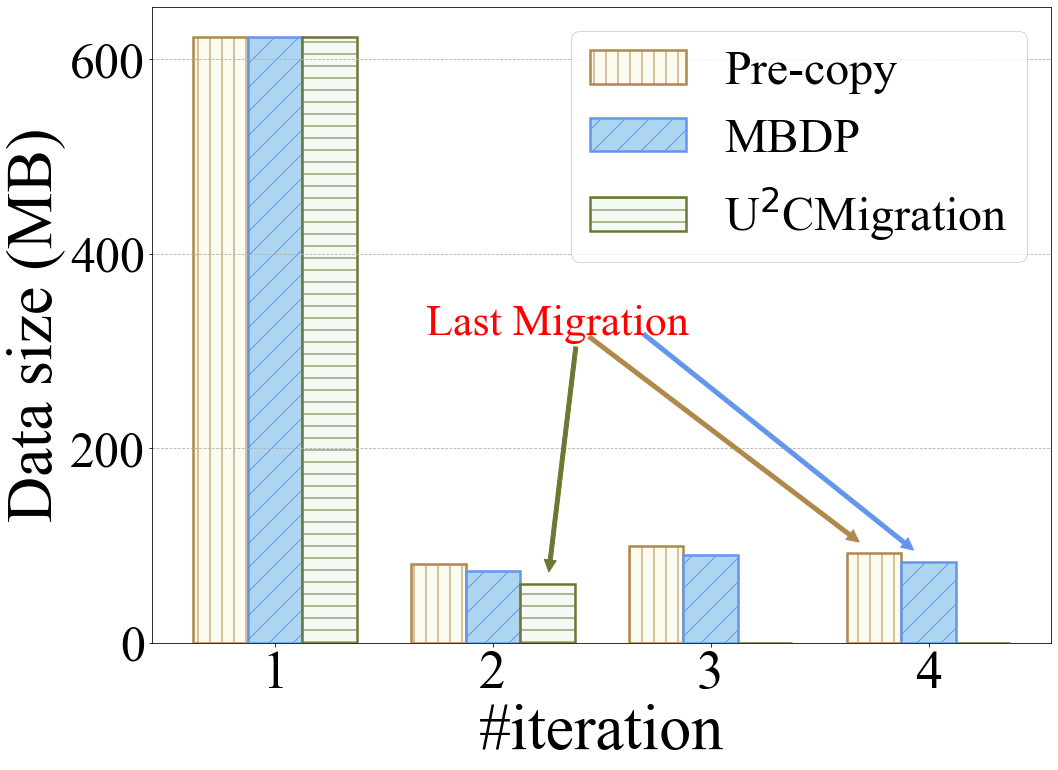

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib


def convert_size(size_str):
    """Converts a size string like '312M' or '1.5G' to megabytes (MB)."""
    size_str = size_str.strip().upper()
    multipliers = {'M': 1, 'G': 1e3, 'K': 1e-3}
    
    if size_str.endswith(('M', 'G', 'K')):
        return float(size_str[:-1]) * multipliers[size_str[-1]]
    else:  # Assuming raw byte value, convert bytes to MB
        return float(size_str) / 1e6

# Sample data
CHK_SIZE = ["623M", "81M", "100M", "92M"]
CHECK_CHK_SIZE_0 = ["623M", "74M", "90M", "83M"]
CHECK_CHK_SIZE = ["623M", "60M", "0M", "0M"]
chk_size_bytes = [convert_size(size) for size in CHK_SIZE]
check_chk_size_bytes = [convert_size(size) for size in CHECK_CHK_SIZE]
check_chk_size_0_bytes = [convert_size(size) for size in CHECK_CHK_SIZE_0]

# Create subplot
fig, ax1 = plt.subplots(figsize=(16, 12))
width = 0.25  # Adjust bar width

# Plotting
x = np.arange(len(CHK_SIZE))
bars1 = ax1.bar(x - width, chk_size_bytes, color="#FCFBF0", edgecolor='#af884a', linewidth=2.5, width=width, hatch='|', label="Pre-copy")
bars2 = ax1.bar(x, check_chk_size_0_bytes, color="#AED6F1", edgecolor='#6495ED', linewidth=2.5, width=width, hatch='/', label="MBDP")
bars3 = ax1.bar(x + width, check_chk_size_bytes, color="#F3FAF3", edgecolor='#6f7632', linewidth=2.5, width=width, hatch='-', label="U$^{2}$CMigration")

# Annotate the last non-zero entries for the last two bars
def annotate_last_non_zero(ax, bar, color, offset,Name):
    last_non_zero_index = len(bar) - 1 - next((i for i, b in enumerate(reversed(bar)) if b.get_height()), 0)
    last_bar = bar[last_non_zero_index]
    ax.annotate(Name, 
                xy=(last_bar.get_x() + last_bar.get_width() / 2, last_bar.get_height()), 
                xytext=offset, textcoords='offset points', 
                arrowprops=dict(facecolor=color, edgecolor=color, shrink=0.05), 
                ha='center', color=color, fontsize=44)
def annotate_last_non_zero2(ax, bar, color,offset,Name):
    last_non_zero_index = len(bar) - 1 - next((i for i, b in enumerate(reversed(bar)) if b.get_height()), 0)
    last_bar = bar[last_non_zero_index]
    ax.annotate(Name, 
                xy=(last_bar.get_x() + last_bar.get_width() / 2, last_bar.get_height()), 
                 xytext=offset,textcoords='offset points', 
               
                ha='center', color=color, fontsize=44)

# Annotate last non-zero entries with different offsets
annotate_last_non_zero(ax1, bars1, '#af884a', (-300, 228),"")
annotate_last_non_zero(ax1, bars2, '#6495ED', (-300, 240),"")
annotate_last_non_zero(ax1, bars3, '#6f7632', (30, 250),"")
annotate_last_non_zero2(ax1, bars3, 'red',(10, 250),"Last Migration")
# Set labels and legend
ax1.set_xlabel('#iteration', fontsize=label_size)
ax1.set_ylabel('Data size (MB)', fontsize=label_size)
ax1.set_xticks(x)
ax1.set_xticklabels(range(1, len(CHK_SIZE) + 1), fontsize=tick_size)
ax1.legend(fontsize=legend_size, loc='upper right')
ax1.grid(axis='y', linestyle='--')
fig.tight_layout()
fig.savefig(os.path.join(".", "npb-live-uuc.pdf"), format='pdf', bbox_inches='tight')

# Display the plot
plt.show()
